# Data Preprocessing


In [1]:
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import pandas as pd
import numpy as np

In [3]:
import io
features = pd.read_csv('/Users/mac/Desktop/1 ML/Final/ML-Walmart/data/features.csv')
# Dataset is now stored in a Pandas Dataframe

In [4]:
features.set_index(features['Date'])
features.set_index(features['Store'])
features.head()
# print(features.shape)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features.shape

(8190, 12)

In [6]:
target = pd.read_csv('/Users/mac/Desktop/1 ML/Final/ML-Walmart/data/train.csv')
target.head()
# print(target.shape)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
target.shape

(421570, 5)

In [8]:
store = pd.read_csv('/Users/mac/Desktop/1 ML/Final/ML-Walmart/data/stores.csv')
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
store.shape

(45, 3)

In [10]:
# right join features and target data on Date
df = pd.merge(features, target, how = 'right', on=['Date', 'Store'])
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,False


In [11]:
df.shape

(421570, 15)

In [15]:
# left join df and store on Store
df = df.drop(['IsHoliday_y'], 1)
df = df.rename(columns={"IsHoliday_x": "IsHoliday"})
walmart = pd.merge(df, store, how = 'left', on=['Store'])
walmart.head()

/var/folders/xk/p06_z1t168n2s_m703g8kcf80000gn/T/ipykernel_81642/294964395.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['IsHoliday_y'], 1)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,A,151315


In [16]:
walmart.shape

(421570, 16)

In [17]:
# check N/A values and remove N/A values
walmart.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

There seems to be some null values in markdown column. Since markdown is discount, we will assume null values as not having any discounts.

In [19]:
walmart = walmart.fillna(0)
# check N/A values and remove N/A values
walmart.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [20]:
# checking if there is any negative values for weekly sales
walmart.loc[walmart['Weekly_Sales']<=0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
846,1,2012-08-10,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,False,6,-139.65,A,151315
2384,1,2012-05-04,75.55,3.749,21290.13,0.0,69.89,4977.35,3261.04,221.671800,7.143,False,18,-1.27,A,151315
6048,1,2010-02-19,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106,False,47,-863.00,A,151315
6049,1,2010-03-12,57.79,2.667,0.00,0.0,0.00,0.00,0.00,211.380643,8.106,False,47,-698.00,A,151315
6051,1,2010-10-08,63.93,2.633,0.00,0.0,0.00,0.00,0.00,211.746754,7.838,False,47,-58.00,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,2010-02-12,27.73,2.773,0.00,0.0,0.00,0.00,0.00,181.982317,8.992,True,80,-0.43,B,118221
419598,45,2010-02-19,31.27,2.745,0.00,0.0,0.00,0.00,0.00,182.034782,8.992,False,80,-0.27,B,118221
419603,45,2010-04-16,54.28,2.899,0.00,0.0,0.00,0.00,0.00,181.692477,8.899,False,80,-1.61,B,118221
419614,45,2010-07-02,76.61,2.815,0.00,0.0,0.00,0.00,0.00,182.318780,8.743,False,80,-0.27,B,118221


In [21]:
# deleting the rows that has negative or 0 for Weekly Sales
# we decide to delete since 430 rows is 0.1% of the dataset
walmart = walmart.loc[walmart['Weekly_Sales'] > 0]

In [22]:
walmart.shape 

(420212, 16)

In [23]:
# extract 2012 data
# to make time as control variable
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart['year'] = pd.DatetimeIndex(walmart['Date']).year
walmart.head()
walmart = walmart[walmart['year']==2012]
walmart.head()
walmart = walmart.drop(['year'], 1)
walmart.head()

/var/folders/xk/p06_z1t168n2s_m703g8kcf80000gn/T/ipykernel_81642/174535389.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  walmart = walmart.drop(['year'], 1)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
100,1,2012-01-06,49.01,3.157,6277.39,21813.16,143.10,1450.13,8483.00,219.714258,7.348,False,1,16567.69,A,151315
101,1,2012-01-13,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,7.348,False,1,16894.40,A,151315
102,1,2012-01-20,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,7.348,False,1,18365.10,A,151315
103,1,2012-01-27,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,7.348,False,1,18378.16,A,151315
104,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,1,23510.49,A,151315


In [24]:
print(len(walmart))

127008


In [25]:
walmart.nunique()

Store               45
Date                43
Temperature       1316
Fuel_Price         323
MarkDown1         1925
MarkDown2         1252
MarkDown3         1351
MarkDown4         1658
MarkDown5         1934
CPI                645
Unemployment       118
IsHoliday            2
Dept                81
Weekly_Sales    116645
Type                 3
Size                40
dtype: int64

In [28]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127008 entries, 100 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         127008 non-null  int64         
 1   Date          127008 non-null  datetime64[ns]
 2   Temperature   127008 non-null  float64       
 3   Fuel_Price    127008 non-null  float64       
 4   MarkDown1     127008 non-null  float64       
 5   MarkDown2     127008 non-null  float64       
 6   MarkDown3     127008 non-null  float64       
 7   MarkDown4     127008 non-null  float64       
 8   MarkDown5     127008 non-null  float64       
 9   CPI           127008 non-null  float64       
 10  Unemployment  127008 non-null  float64       
 11  IsHoliday     127008 non-null  bool          
 12  Dept          127008 non-null  int64         
 13  Weekly_Sales  127008 non-null  float64       
 14  Type          127008 non-null  object        
 15  Size          1

In [29]:
# changing store and dept into category variable
walmart['Store'] = walmart['Store'].astype('category')
walmart['Dept'] = walmart['Store'].astype('category')
walmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127008 entries, 100 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         127008 non-null  category      
 1   Date          127008 non-null  datetime64[ns]
 2   Temperature   127008 non-null  float64       
 3   Fuel_Price    127008 non-null  float64       
 4   MarkDown1     127008 non-null  float64       
 5   MarkDown2     127008 non-null  float64       
 6   MarkDown3     127008 non-null  float64       
 7   MarkDown4     127008 non-null  float64       
 8   MarkDown5     127008 non-null  float64       
 9   CPI           127008 non-null  float64       
 10  Unemployment  127008 non-null  float64       
 11  IsHoliday     127008 non-null  bool          
 12  Dept          127008 non-null  category      
 13  Weekly_Sales  127008 non-null  float64       
 14  Type          127008 non-null  object        
 15  Size          1

# Data Visualization
Categorical Variables

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

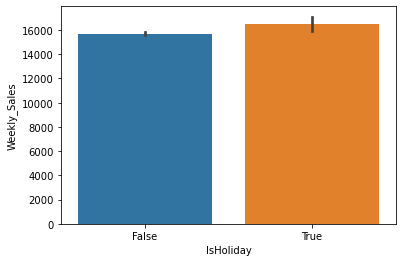

In [30]:
# Holiday or not
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=walmart)

It seems that weekly sales increase during holidays, but it is not a significant increase.

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

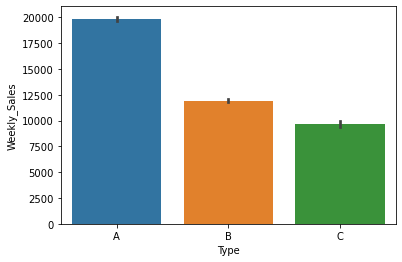

In [31]:
# Type
sns.barplot(x='Type', y='Weekly_Sales', data=walmart)

It seems that weekly sales increase the most if Type is A, followed by Type B and Type C.

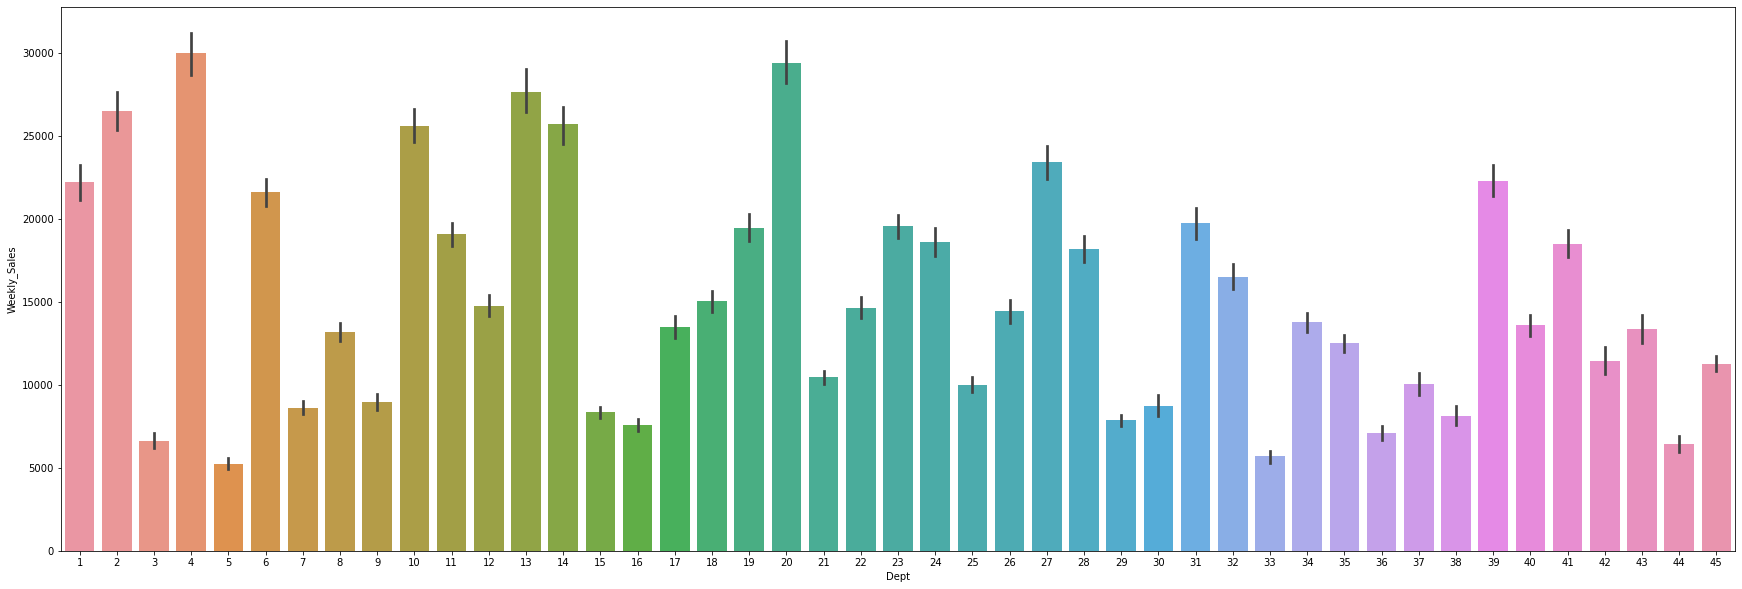

In [32]:
# Department
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=walmart)

From the above bar graph, we can clearly see that some departments such as 2,4, and 19 have high weekly sales. Some departments such as 3,5, and 33 have low weekly sales.

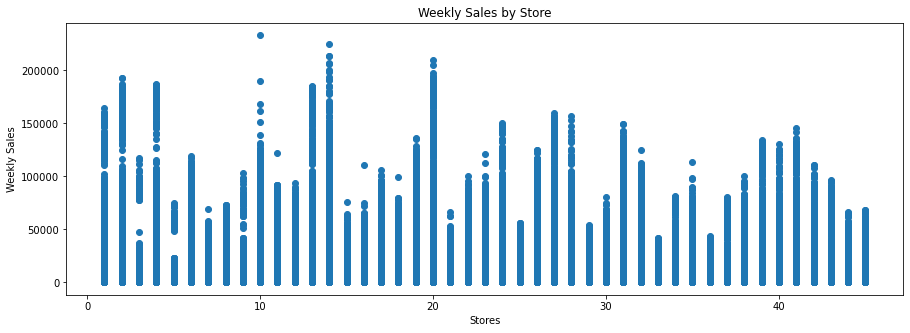

In [33]:
# Store
x = walmart['Store']
y = walmart['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

We can see a few stores have high weekly sales. The highest sales for most stores is between 50,000 to 100,000.

Numeric Variables

<AxesSubplot:xlabel='Fuel_Price'>

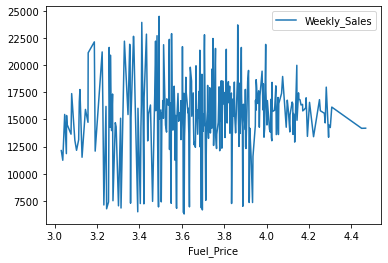

In [34]:
fuel_price = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

The line chart between weekly sales and fuel price is fluctuating a lot and there is no visible trend.

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

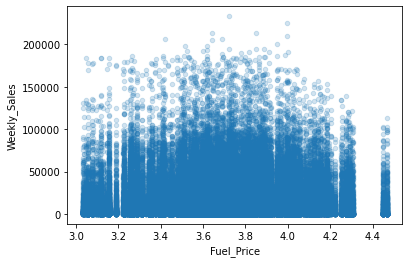

In [43]:
walmart.plot.scatter(x="Fuel_Price",y="Weekly_Sales", alpha=0.2)

<AxesSubplot:xlabel='Temperature'>

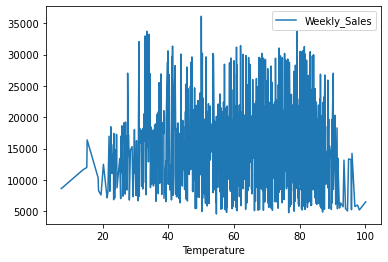

In [36]:
temp = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Temperature")
temp.plot()

The line chart between weekly sales and temperature is fluctuating a lot and there is no visible trend.

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

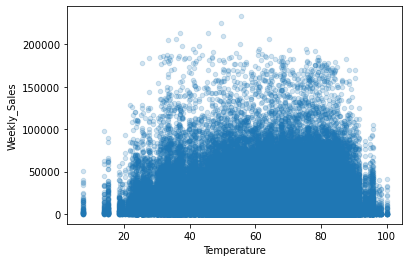

In [44]:
walmart.plot.scatter(x="Temperature",y="Weekly_Sales", alpha=0.2)

<AxesSubplot:xlabel='CPI'>

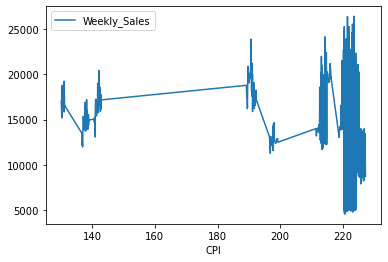

In [38]:
CPI = pd.pivot_table(walmart, values = "Weekly_Sales", index= "CPI")
CPI.plot()

The line chart between weekly sales and CPI is fluctuating a lot and there is no visible trend. The weekly sales are also cluster around some CPI values only.

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

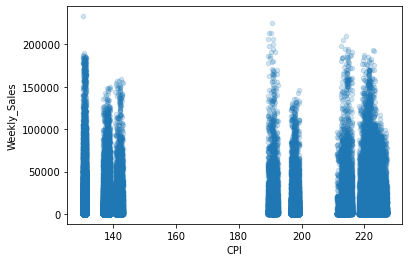

In [45]:
walmart.plot.scatter(x="CPI",y="Weekly_Sales", alpha=0.2)

<AxesSubplot:xlabel='Unemployment'>

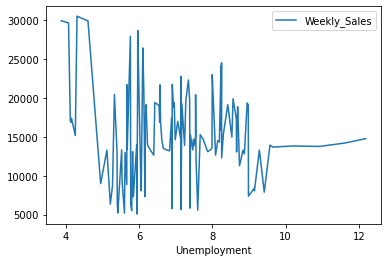

In [40]:
unemployment = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

The line chart 

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

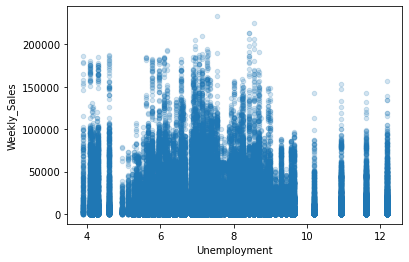

In [46]:
walmart.plot.scatter(x="Unemployment",y="Weekly_Sales", alpha=0.2)

<AxesSubplot:xlabel='Size'>

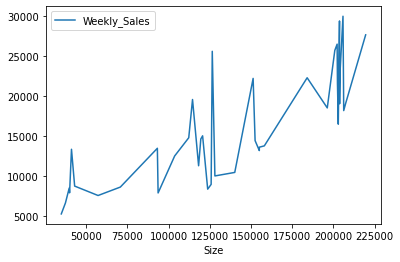

In [42]:
size = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Size")
size.plot()

# Random Sample

In [ ]:
sample_size = int(len(walmart)*0.01)
print(sample_size)
walmart_sample = walmart.sample(sample_size,random_state=3)
walmart_sample.head()

1270


,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
16289,2,2012-10-26,69.79,3.506,223.078337,6.170,False,46,26984.28,A,202307
347895,37,2012-03-02,64.54,3.630,219.534098,7.244,False,10,341.79,C,39910
374631,40,2012-06-15,63.39,3.683,138.129533,4.125,False,28,280.78,A,155083
175475,18,2012-08-17,73.25,3.840,138.185710,8.535,False,81,12963.41,B,120653
106382,11,2012-01-20,56.43,3.268,223.470055,6.833,False,85,1725.03,A,207499


In [ ]:
#checking if there is any negative values for weekly sales
walmart_sample.loc[walmart_sample['Weekly_Sales']<=0]

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size


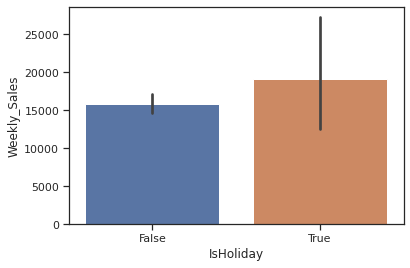

In [ ]:
# Holiday or not
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=walmart_sample)

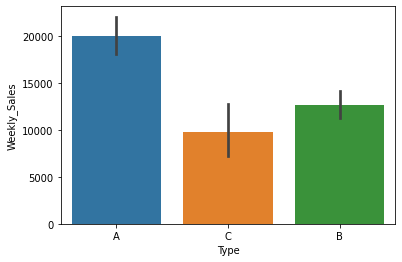

In [ ]:
# Type
sns.barplot(x='Type', y='Weekly_Sales', data=walmart_sample)

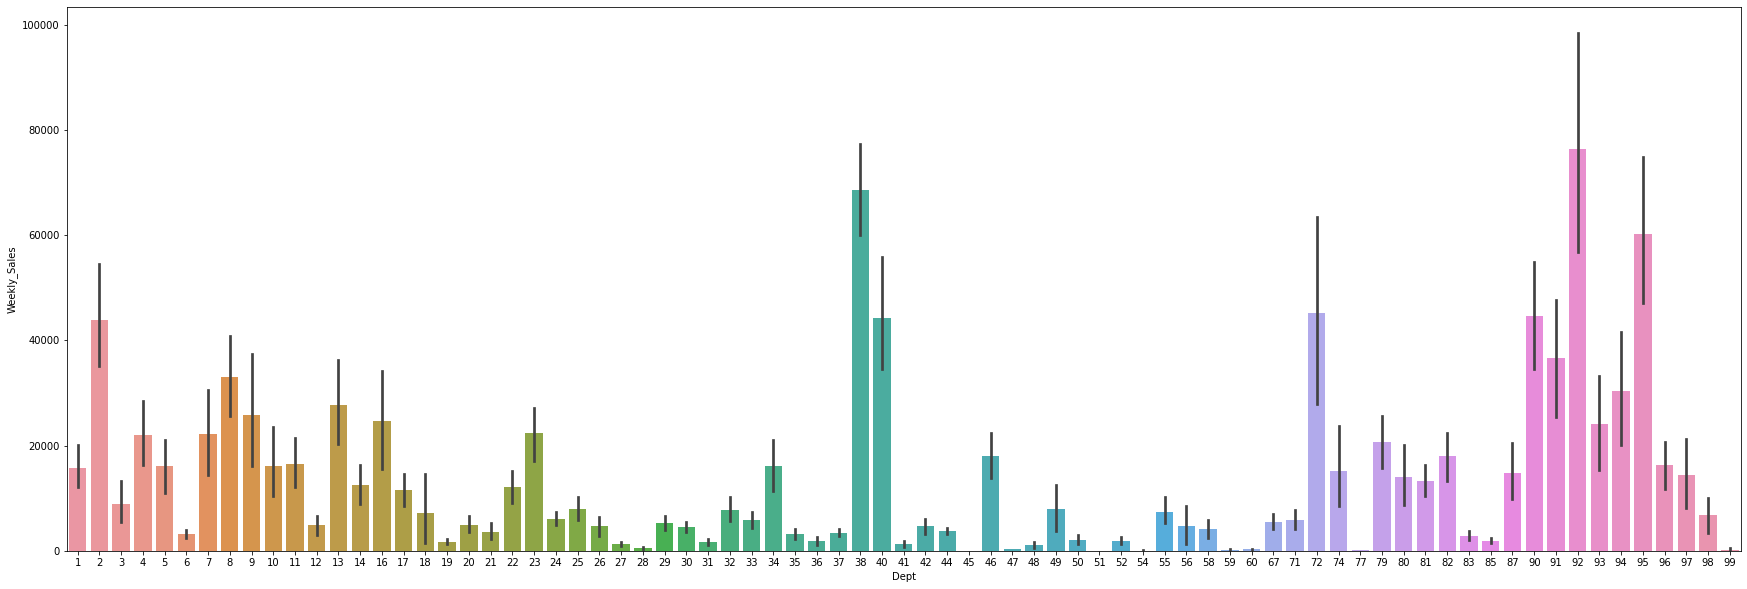

In [ ]:
# Department
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=walmart_sample)

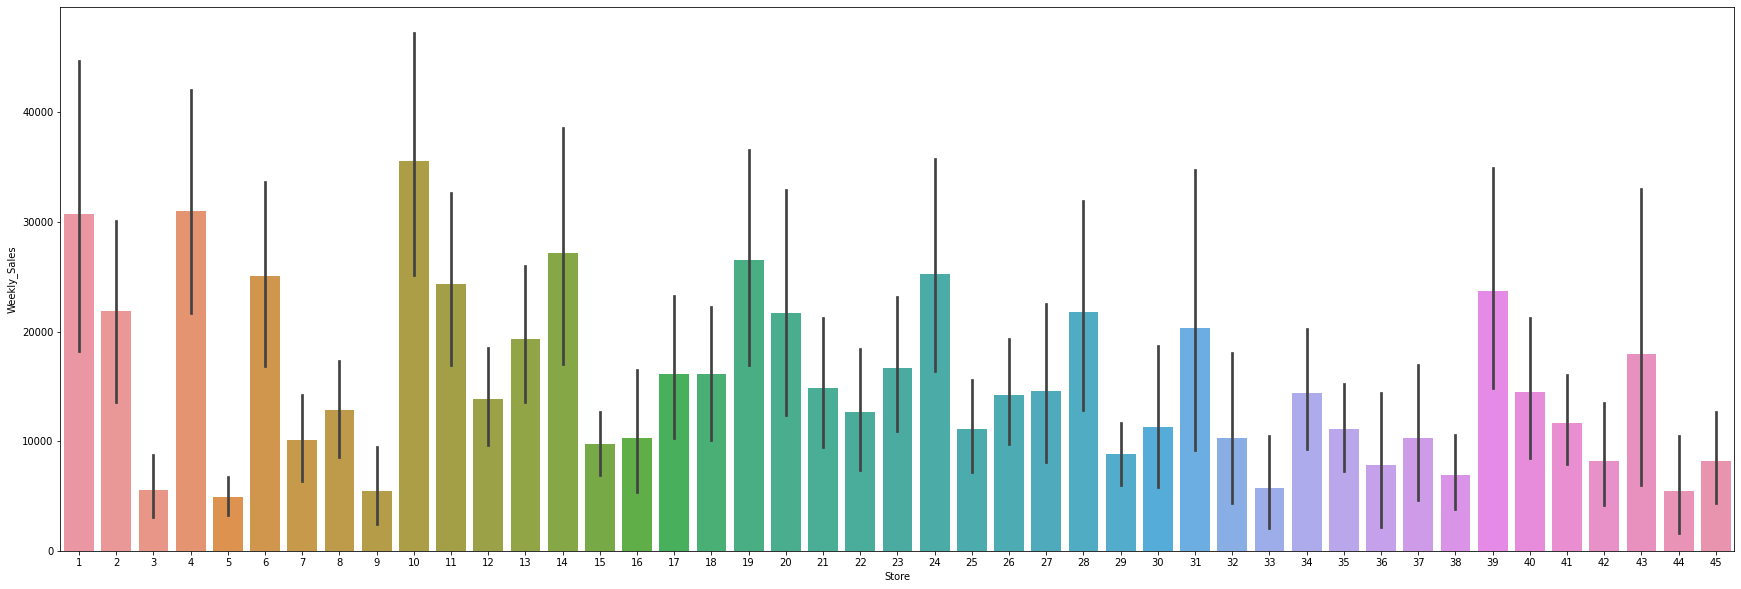

In [ ]:
# Store
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=walmart_sample)

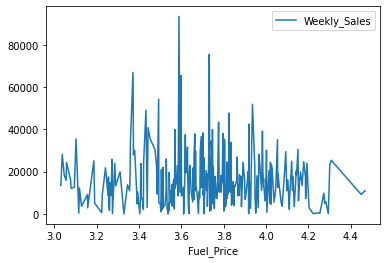

In [ ]:
fuel_price = pd.pivot_table(walmart_sample, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


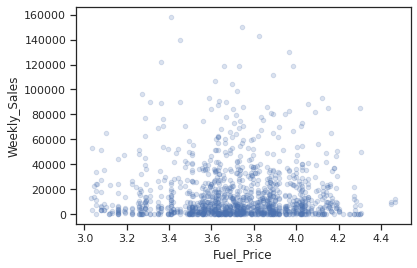

In [ ]:
walmart_sample.plot.scatter(x="Fuel_Price",y="Weekly_Sales", alpha=0.2)

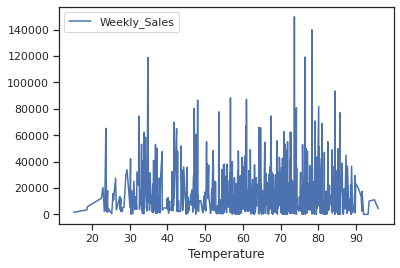

In [ ]:
temp = pd.pivot_table(walmart_sample, values = "Weekly_Sales", index= "Temperature")
temp.plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


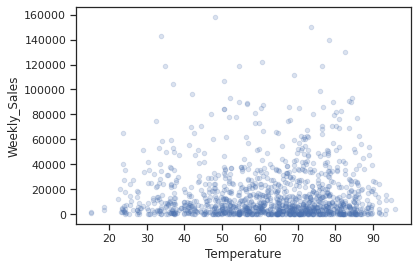

In [ ]:
walmart_sample.plot.scatter(x="Temperature",y="Weekly_Sales", alpha=0.2)

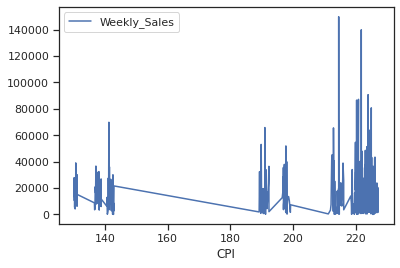

In [ ]:
CPI = pd.pivot_table(walmart_sample, values = "Weekly_Sales", index= "CPI")
CPI.plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


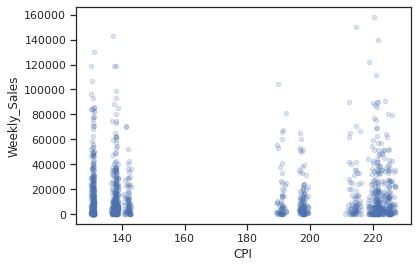

In [ ]:
walmart_sample.plot.scatter(x="CPI",y="Weekly_Sales", alpha=0.2)

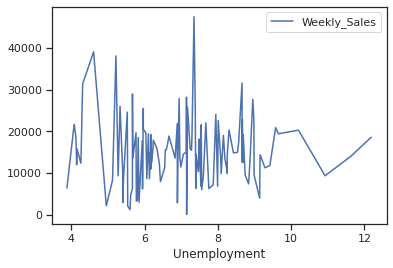

In [ ]:
unemployment = pd.pivot_table(walmart_sample, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


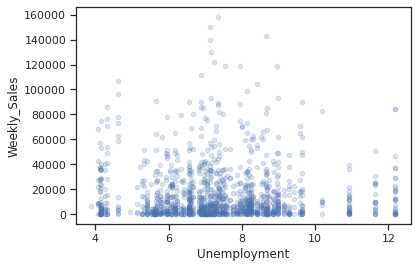

In [ ]:
walmart_sample.plot.scatter(x="Unemployment",y="Weekly_Sales", alpha=0.2)

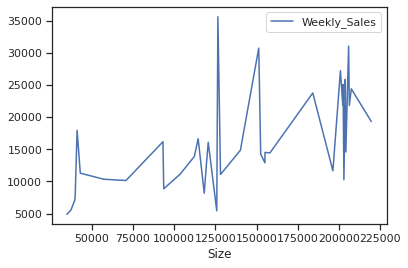

In [ ]:
size = pd.pivot_table(walmart_sample, values = "Weekly_Sales", index= "Size")
size.plot()

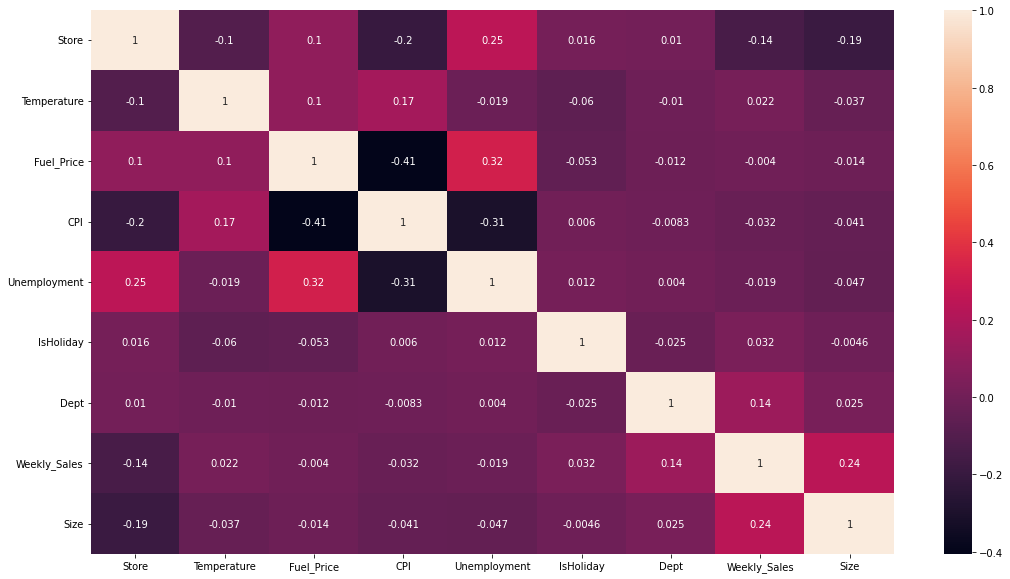

In [ ]:
plt.figure(figsize = (18,10))
sns.heatmap(walmart_sample.corr(), annot=True)

KeyError: ignored

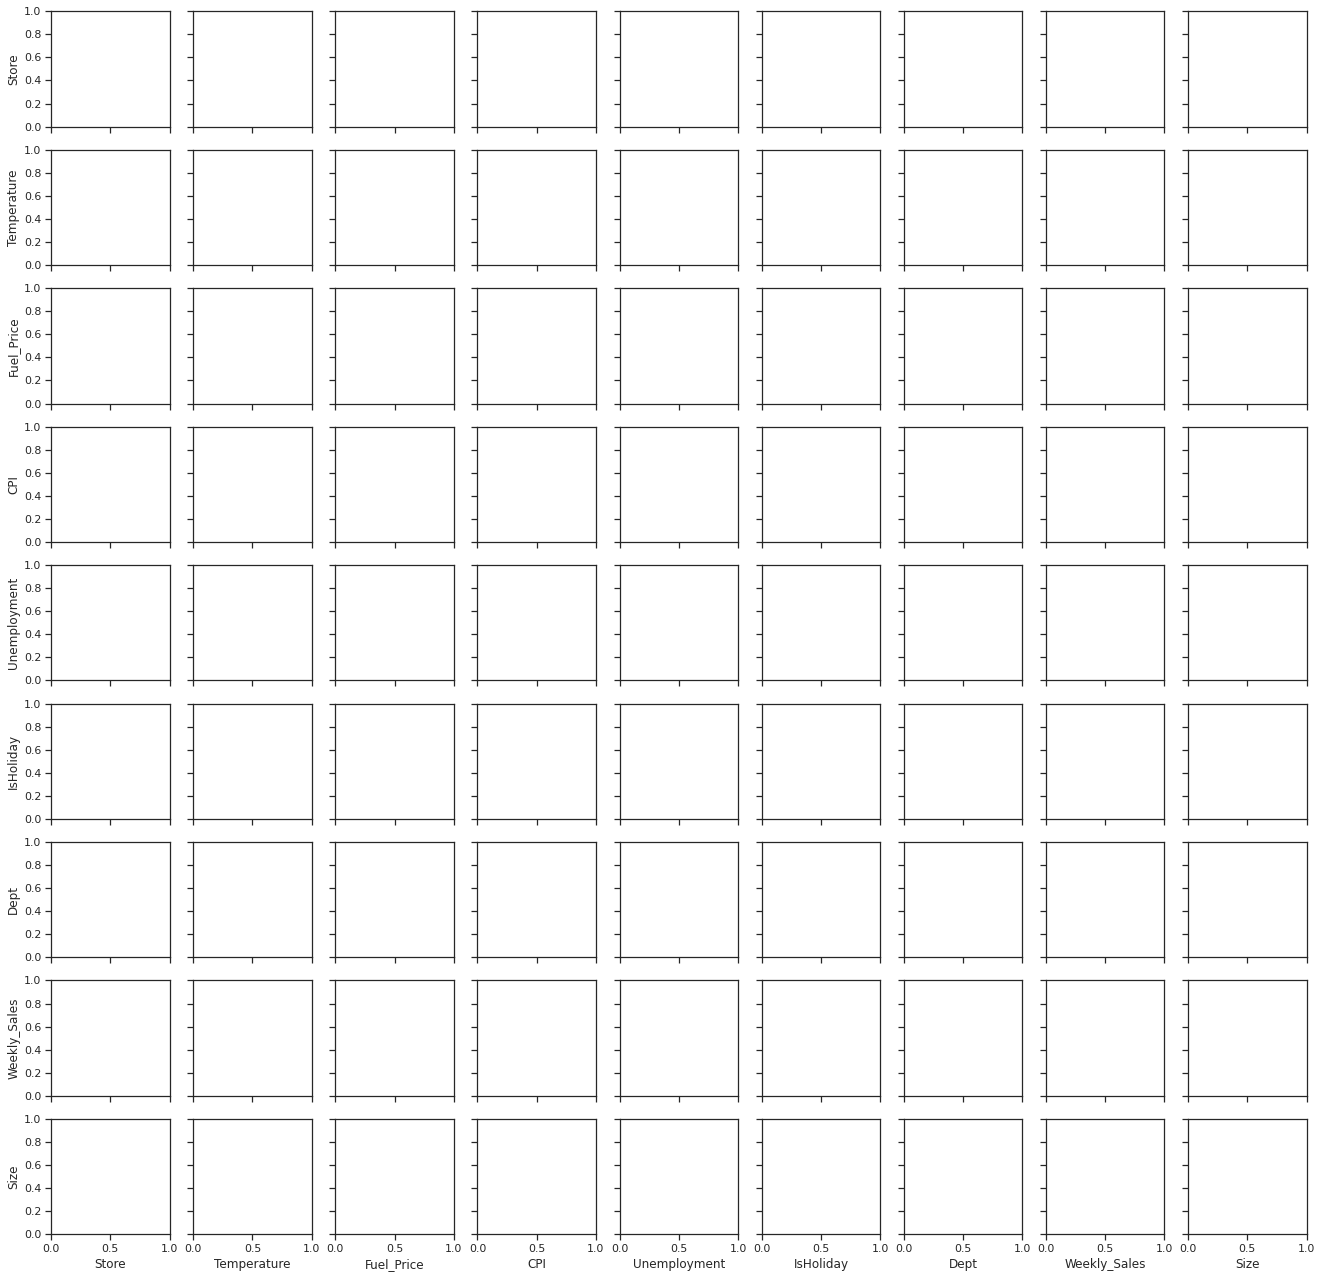

In [ ]:
#sns.set_theme(style="ticks")

#sns.pairplot(walmart_sample, hue="isHoliday")

# Data Preprocessing Before Modeling

In [ ]:
walmart_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 16289 to 35327
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         1270 non-null   int64         
 1   Date          1270 non-null   datetime64[ns]
 2   Temperature   1270 non-null   float64       
 3   Fuel_Price    1270 non-null   float64       
 4   CPI           1270 non-null   float64       
 5   Unemployment  1270 non-null   float64       
 6   IsHoliday     1270 non-null   bool          
 7   Dept          1270 non-null   int64         
 8   Weekly_Sales  1270 non-null   float64       
 9   Type          1270 non-null   object        
 10  Size          1270 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 142.7+ KB


In [ ]:
# changing store and dept into category variable
walmart_sample['Store'] = walmart_sample['Store'].astype('category')
walmart_sample['Dept'] = walmart_sample['Store'].astype('category')
walmart_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 16289 to 35327
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         1270 non-null   category      
 1   Date          1270 non-null   datetime64[ns]
 2   Temperature   1270 non-null   float64       
 3   Fuel_Price    1270 non-null   float64       
 4   CPI           1270 non-null   float64       
 5   Unemployment  1270 non-null   float64       
 6   IsHoliday     1270 non-null   bool          
 7   Dept          1270 non-null   category      
 8   Weekly_Sales  1270 non-null   float64       
 9   Type          1270 non-null   object        
 10  Size          1270 non-null   int64         
dtypes: bool(1), category(2), datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 128.1+ KB


In [ ]:
walmart_sample.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [ ]:
walmart_Dummies_df = pd.get_dummies(walmart_sample,drop_first=False)
walmart_Dummies_df.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Size,Store_1,Store_2,...,Dept_39,Dept_40,Dept_41,Dept_42,Dept_43,Dept_44,Dept_45,Type_A,Type_B,Type_C
16289,2012-10-26,69.79,3.506,223.078337,6.170,False,26984.28,202307,0,1,...,0,0,0,0,0,0,0,1,0,0
347895,2012-03-02,64.54,3.630,219.534098,7.244,False,341.79,39910,0,0,...,0,0,0,0,0,0,0,0,0,1
374631,2012-06-15,63.39,3.683,138.129533,4.125,False,280.78,155083,0,0,...,0,1,0,0,0,0,0,1,0,0
175475,2012-08-17,73.25,3.840,138.185710,8.535,False,12963.41,120653,0,0,...,0,0,0,0,0,0,0,0,1,0
106382,2012-01-20,56.43,3.268,223.470055,6.833,False,1725.03,207499,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# changing Truw/ False to 0/1 for IsHoliday
walmart_Dummies_df.replace({False: 0, True: 1}, inplace=True)

In [ ]:
walmart_Dummies_df.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Size,Store_1,Store_2,...,Dept_39,Dept_40,Dept_41,Dept_42,Dept_43,Dept_44,Dept_45,Type_A,Type_B,Type_C
16289,2012-10-26,69.79,3.506,223.078337,6.170,0,26984.28,202307,0,1,...,0,0,0,0,0,0,0,1,0,0
347895,2012-03-02,64.54,3.630,219.534098,7.244,0,341.79,39910,0,0,...,0,0,0,0,0,0,0,0,0,1
374631,2012-06-15,63.39,3.683,138.129533,4.125,0,280.78,155083,0,0,...,0,1,0,0,0,0,0,1,0,0
175475,2012-08-17,73.25,3.840,138.185710,8.535,0,12963.41,120653,0,0,...,0,0,0,0,0,0,0,0,1,0
106382,2012-01-20,56.43,3.268,223.470055,6.833,0,1725.03,207499,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# drop date，if needed
#walmart_Dummies_df = walmart_Dummies_df.drop(['Date'],1)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# cross validation
nmc = 100
testSize = 0.25

y = walmart_Dummies_df['Weekly_Sales']
X = walmart_Dummies_df[drop]
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(lr, X, y, cv=shuffle,return_train_score=True)
print('sX,y')
print('train',np.mean(CVInfo['train_score']))
print('test',np.mean(CVInfo['test_score']))


KeyError: ignored

# SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons

from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

# Cross-validation helpers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
np.random.seed(47)

# Tree Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.colors import ListedColormap


%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
# drop date
walmart_Dummies_df = walmart_Dummies_df.drop(['Date'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
np.random.seed(47)
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeRegressor

print(walmart_sample.shape)
X_train, X_test, y_train, y_test = train_test_split(
    walmart_Dummies_df, walmart_Dummies_df.Weekly_Sales, random_state=0)
tree = DecisionTreeRegressor(max_depth=10,random_state=1124)
tree.fit(X_train, y_train)


print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

(1270, 11)
Accuracy on training set: 1.000
Accuracy on test set: 0.997
